** Polymer stats iPython notebook**

Supplementary material for the IB Materials lectures on rubber elasticity and entropic forces.

A Kabla, 2016

_______

This notebook provides a simple code to generate random polymer configurations in 2D and build the statistics of the end-to-end distance that is required for the calculation of the configurational entropy.

In [1]:
# Load relevant modules

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

import numpy as np
%config InlineBackend.figure_format = 'svg'

from matplotlib import rcParams
rcParams["font.size"] = "12"
rcParams['figure.figsize'] = 8, 8



The function get_polymer_shape($n_m$,$a_m$) generates a random configuration for a polymer of $n_m$ monomers, each of length $a_m$. It returns an array of $x_i$ and $y_i$ coordinates for each monomer of the chain, with $x_0=y_0=0$.

In [2]:
def get_polymer_shape(nm, am):
    thetas = (2*np.pi) * np.random.rand(nm)
    dx = am * np.cos(thetas)
    dy = am * np.sin(thetas)
    x = np.add.accumulate(dx)
    y = np.add.accumulate(dy)
    return((x,y))


The cell below simply calculates and displays individual polymer configurations.

(-2.0, 10.0, -9.0, 0.0)

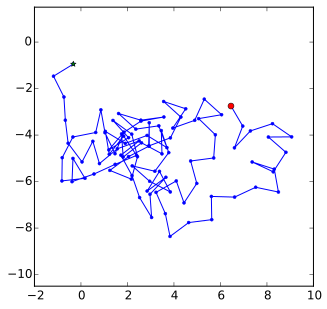

In [4]:
number_of_monomers = 100
monomer_length = 1.

(x,y)=get_polymer_shape(number_of_monomers, monomer_length)

rcParams['figure.figsize'] = 5, 5

plt.plot(x,y,'.-')
plt.plot([x[0]],[y[0]],'*')
plt.plot([x[-1]],[y[-1]],'o')
plt.axis('equal')

#plt.savefig("polymer_shape.svg")


The function ensemble_stat calculates $n$ different polymer configurations of identical number of mmonomers $n_m$ and monomer length $a_m$, and returns 3 arrays containing the $x$ and $y$ coordinates of the end-to-end vectors, as well as the total length, of each configuration.

In [6]:
def ensemble_stat(n, nm, am):
    xa=np.zeros(n)
    ya=np.zeros(n)
    ra=np.zeros(n)
    for i in range(n):
        (x,y)=get_polymer_shape(nm, am)
        (xa[i],ya[i])=(x[-1],y[-1])
        ra[i]=np.sqrt(xa[i]**2+ya[i]**2)
    return(xa,ya,ra)


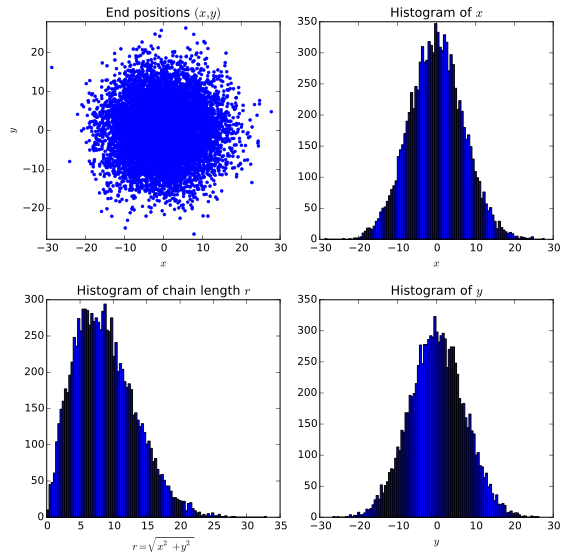

In [8]:
# number of polymer configurations
n = 10000

(xa,ya,ra) = ensemble_stat(n, number_of_monomers, monomer_length)

rcParams["font.size"] = "10.5"
rcParams['figure.figsize'] = 8, 8

plt.subplot(2,2,1)
plt.plot(xa,ya,'.')
plt.axis('equal')
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("End positions $(x,y)$")

plt.subplot(2,2,2)
plt.hist(xa, np.sqrt(n))
plt.xlabel("$x$")
plt.title("Histogram of $x$")

plt.subplot(2,2,4)
plt.hist(ya, np.sqrt(n))
plt.xlabel("$y$")
plt.title("Histogram of $y$")

plt.subplot(2,2,3)
plt.hist(ra, np.sqrt(n))
plt.xlabel("$r = \sqrt{x^2+y^2}$")
plt.title("Histogram of chain length $r$")

plt.tight_layout()


#plt.savefig("polymer_stats.pdf")



<r>/sqrt(n)r = 0.889487827977


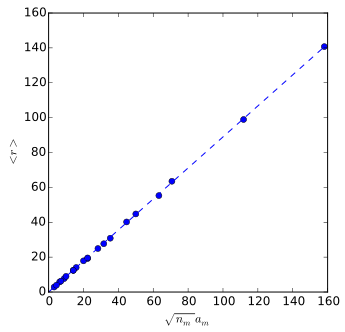

In [28]:
rcParams["font.size"] = "12"
rcParams['figure.figsize'] = 5, 5

nm_list = [10,20,50,100,200,500,1000]
am_list = [1,2,5]
nval = len(nm_list)*len(am_list)

r = []
sqrtna = []

for n_m in nm_list:
    for a_m in am_list:
        (xa,ya,ra) = ensemble_stat(n, n_m, a_m)
        r.append(np.mean(ra))
        sqrtna.append(np.sqrt(n_m)*a_m)
        
plt.plot(sqrtna, r, 'bo')
plt.xlabel("$\sqrt{n_m} a_m$")
plt.ylabel("$< r >$")
        
# Add linear regression to the plot    
    
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(sqrtna,r)

print("<r>/sqrt(n)r = " + str(slope))

plt.plot([0,max(sqrtna)], [0, slope * max(sqrtna)], '--')
    
plt.savefig("length_vs_mon_number.svg")

